In [1]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Load the merged dataset
data = pd.read_csv('D:/KAIM/Week 12/KAIM WEEK12/Merged_Economic_Brent_Data.csv')

# Define the imputer (e.g., fill NaNs with the mean of each column)
imputer = SimpleImputer(strategy='mean')  # You can change 'mean' to 'median' or 'most_frequent'

# Fit and transform the dataset (excluding non-numeric columns)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns  # Select numeric columns only
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

# Check if missing values are handled
print("Missing values after imputation:")
print(data.isnull().sum())


Missing values after imputation:
Date                     0
Price                    0
GDP_Growth               0
Inflation_Rate           0
Unemployment_Rate        0
USD_EUR_Exchange_Rate    0
dtype: int64


In [2]:
# Impute GDP_Growth with mean
data['GDP_Growth'].fillna(data['GDP_Growth'].mean(), inplace=True)

# Impute Inflation_Rate with median
data['Inflation_Rate'].fillna(data['Inflation_Rate'].median(), inplace=True)

# Impute Unemployment_Rate with mode
data['Unemployment_Rate'].fillna(data['Unemployment_Rate'].mode()[0], inplace=True)

# Check if missing values are handled
print("Missing values after column-wise imputation:")
print(data.isnull().sum())


C:\Users\Robel\AppData\Local\Temp\ipykernel_9876\267667152.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['GDP_Growth'].fillna(data['GDP_Growth'].mean(), inplace=True)
C:\Users\Robel\AppData\Local\Temp\ipykernel_9876\267667152.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

Missing values after column-wise imputation:
Date                     0
Price                    0
GDP_Growth               0
Inflation_Rate           0
Unemployment_Rate        0
USD_EUR_Exchange_Rate    0
dtype: int64


In [3]:
# Save the imputed dataset to a new file
data.to_csv('D:/KAIM/Week 12/KAIM WEEK12/Imputed_Economic_Brent_Data.csv', index=False)
print("Imputed dataset saved successfully!")


Imputed dataset saved successfully!


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('D:/KAIM/Week 12/KAIM WEEK12/Imputed_Economic_Brent_Data.csv')

# Features (independent variables) and target (dependent variable)
X = data[['GDP_Growth', 'Inflation_Rate', 'Unemployment_Rate', 'USD_EUR_Exchange_Rate']]  # Replace with relevant features
y = data['Price']  # Target variable (Brent oil prices)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Prepare time series data (use 'Date' as index)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Fit an ARIMA model (adjust p, d, q for better performance)
arima_model = ARIMA(data['Price'], order=(5, 1, 0))  # Example: (p=5, d=1, q=0)
arima_model_fit = arima_model.fit()

# Forecast future prices
forecast = arima_model_fit.forecast(steps=10)  # Forecast the next 10 time points
print("ARIMA Forecast:", forecast)


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA Forecast: 6724    74.638145
6725    74.618738
6726    74.662504
6727    74.664369
6728    74.659828
6729    74.658058
6730    74.659085
6731    74.659404
6732    74.659310
6733    74.659225
Name: predicted_mean, dtype: float64


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [8]:
from statsmodels.tsa.api import VAR

# Prepare the data for VAR (ensure no missing values and set Date as index)
var_data = data[['Price', 'GDP_Growth', 'Inflation_Rate', 'Unemployment_Rate']].dropna()
var_model = VAR(var_data)

# Fit the model
fitted_model = var_model.fit(maxlags=5)  # Choose an appropriate lag value (use criteria like AIC/BIC)
print(fitted_model.summary())

# Forecast future values
forecast = fitted_model.forecast(var_data.values[-fitted_model.k_ar:], steps=10)
print("VAR Forecast:", forecast)


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 10, Mar, 2025
Time:                     19:36:41
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    15.8187
Nobs:                     6719.00    HQIC:                   15.7630
Log likelihood:          -90908.3    FPE:                6.80771e+06
AIC:                      15.7336    Det(Omega_mle):     6.72326e+06
--------------------------------------------------------------------
Results for equation Price
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       -3.115366         1.042157           -2.989           0.003
L1.Price                     1.028952         0.012219           84.211           0.000
L1.GDP_Growth                0.0

In [9]:
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

# Fit a Markov Switching Model with 2 regimes (low and high volatility)
ms_model = MarkovRegression(data['Price'], k_regimes=2, trend='c', switching_variance=True)
ms_results = ms_model.fit()

print(ms_results.summary())

# Regime probabilities
regime_probs = ms_results.smoothed_marginal_probabilities
print("Regime Probabilities:", regime_probs)


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                        Markov Switching Model Results                        
Dep. Variable:                  Price   No. Observations:                 6724
Model:               MarkovRegression   Log Likelihood              -28356.907
Date:                Mon, 10 Mar 2025   AIC                          56725.815
Time:                        19:37:49   BIC                          56766.695
Sample:                             0   HQIC                         56739.930
                               - 6724                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.9115      0.246    137.764      0.000      33.429      34.394
sigma2       137.0006      4.005     34.209      0.0

In [11]:
import joblib

# Save the fitted VAR model
joblib.dump(fitted_model, 'VAR_model.pkl')
print("VAR model saved successfully as 'VAR_model.pkl'.")


VAR model saved successfully as 'VAR_model.pkl'.


In [12]:
# Load the saved VAR model
loaded_var_model = joblib.load('VAR_model.pkl')
print("VAR model loaded successfully.")

# Use the loaded model for forecasting
forecast_var = loaded_var_model.forecast(var_data.values[-loaded_var_model.k_ar:], steps=10)
print("VAR Forecast:", forecast_var)


VAR model loaded successfully.
VAR Forecast: [[7.46312881e+01 1.40626989e+04 2.01752170e+02 5.76341689e+00]
 [7.46092893e+01 1.40439796e+04 2.01783851e+02 5.76752541e+00]
 [7.46458180e+01 1.40364740e+04 2.01661966e+02 5.76329654e+00]
 [7.46385659e+01 1.40418351e+04 2.01773214e+02 5.76107230e+00]
 [7.46280519e+01 1.40447370e+04 2.01820091e+02 5.76178774e+00]
 [7.46200194e+01 1.40462789e+04 2.01871906e+02 5.76214791e+00]
 [7.46147288e+01 1.40451229e+04 2.01886486e+02 5.76215671e+00]
 [7.46084485e+01 1.40457073e+04 2.01903549e+02 5.76185096e+00]
 [7.46019799e+01 1.40466622e+04 2.01939287e+02 5.76170725e+00]
 [7.45956616e+01 1.40473932e+04 2.01963687e+02 5.76168996e+00]]


In [13]:
import joblib

# Save the ARIMA model
joblib.dump(arima_model_fit, 'ARIMA_model.pkl')
print("ARIMA model saved successfully as 'ARIMA_model.pkl'.")


ARIMA model saved successfully as 'ARIMA_model.pkl'.


In [14]:
# Load the saved ARIMA model
loaded_arima_model = joblib.load('ARIMA_model.pkl')
print("ARIMA model loaded successfully.")

# Use the loaded model for forecasting
forecast_arima = loaded_arima_model.forecast(steps=10)
print("ARIMA Forecast:", forecast_arima)


ARIMA model loaded successfully.
ARIMA Forecast: 6724    74.638145
6725    74.618738
6726    74.662504
6727    74.664369
6728    74.659828
6729    74.658058
6730    74.659085
6731    74.659404
6732    74.659310
6733    74.659225
Name: predicted_mean, dtype: float64


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


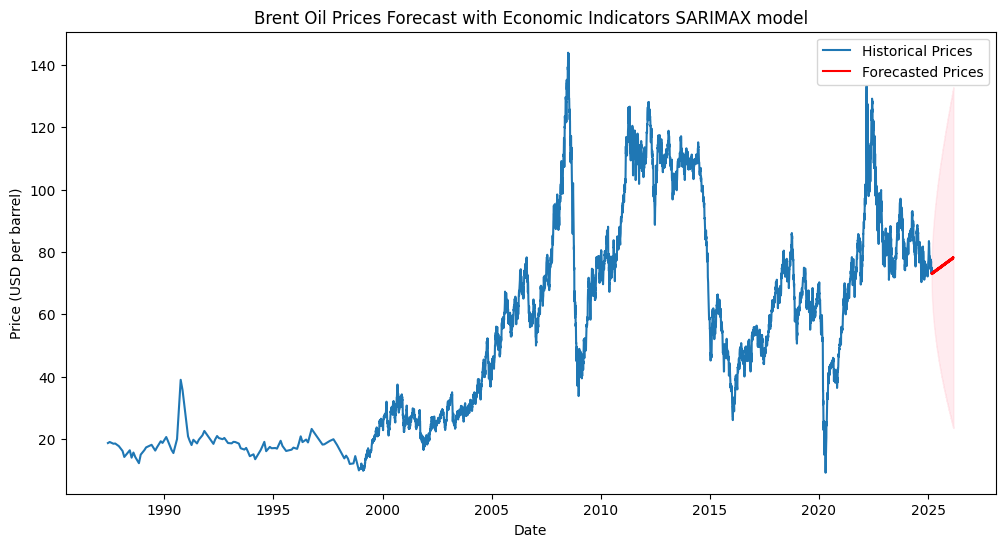

In [4]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the datasets
prices = pd.read_csv('Cleaned_BrentOilPrices.csv', parse_dates=['Date'])
indicators = pd.read_csv('Cleaned_Economic_Indicators.csv', parse_dates=['Date'])

# Merge the datasets on the Date column
merged_data = pd.merge(prices, indicators, on='Date')

# Set the target variable (Brent Oil Prices) and exogenous variables (economic indicators)
prices_series = merged_data['Price']
exogenous_variables = merged_data[['GDP_Growth', 'Inflation_Rate', 'Unemployment_Rate', 'USD_EUR_Exchange_Rate']]

# Define and fit the SARIMAX model
model = SARIMAX(prices_series, exog=exogenous_variables, 
                order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast future prices
forecast_length = 365  # Forecast for the next year

# Calculate the mean values of economic indicators for the last 365 rows
mean_values = exogenous_variables.iloc[-365:].mean()

# Create a DataFrame by repeating the mean values for forecast_length steps
future_exogenous = pd.DataFrame([mean_values.values] * forecast_length, columns=exogenous_variables.columns)

# Forecast using future_exogenous
forecast = model_fit.get_forecast(steps=forecast_length, exog=future_exogenous)
forecast_prices = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], prices_series, label='Historical Prices')
future_dates = pd.date_range(start=merged_data['Date'].iloc[-1], periods=forecast_length + 1, freq='D')[1:]
plt.plot(future_dates, forecast_prices, label='Forecasted Prices', color='r')
plt.fill_between(future_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Brent Oil Prices Forecast with Economic Indicators SARIMAX model')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()


In [5]:
import pickle

# Save the fitted model to a file
with open('sarimax_model.pkl', 'wb') as file:
    pickle.dump(model_fit, file)


In [6]:
# Load the saved model
with open('sarimax_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Now you can use the loaded model for forecasting or other tasks
forecast = loaded_model.get_forecast(steps=forecast_length, exog=future_exogenous)
forecast_prices = forecast.predicted_mean


ARIMA MAE: 23.326140785314852
ARIMA RMSE: 27.423771023253593
ARIMA MAPE: 32.01%


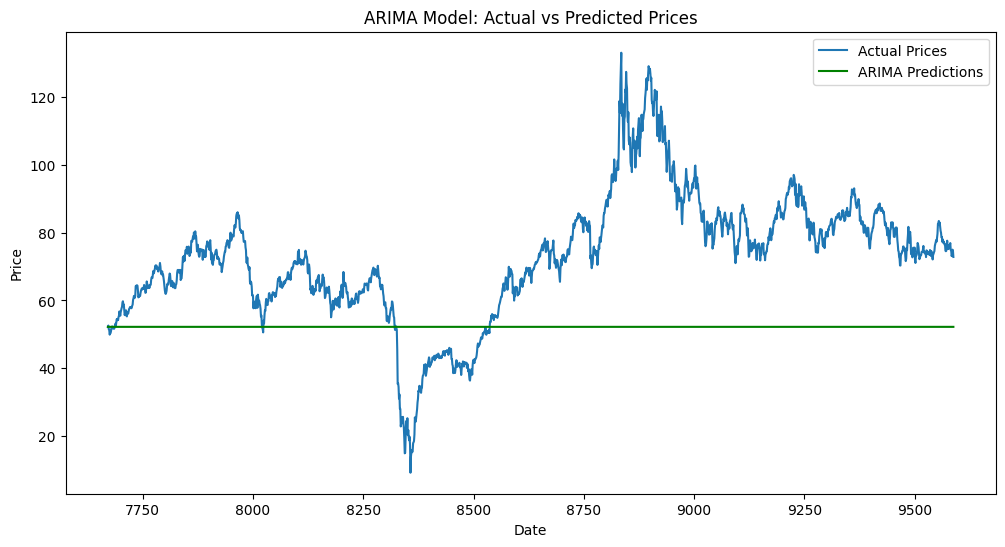

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset (prices only for ARIMA)
prices = pd.read_csv('Cleaned_BrentOilPrices.csv', parse_dates=['Date'])
prices_series = prices['Price']

# Split the data into training and testing sets
train_size = int(0.8 * len(prices_series))
train_prices = prices_series[:train_size]
test_prices = prices_series[train_size:]

# Fit the ARIMA model
arima_model = ARIMA(train_prices, order=(1, 1, 1))  # Example order, adjust based on tuning
arima_model_fit = arima_model.fit()

# Forecast using ARIMA
arima_forecast = arima_model_fit.forecast(steps=len(test_prices))

# Calculate evaluation metrics
arima_mae = mean_absolute_error(test_prices, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test_prices, arima_forecast))
arima_mape = np.mean(np.abs((test_prices - arima_forecast) / test_prices)) * 100

# Print evaluation metrics
print(f"ARIMA MAE: {arima_mae}")
print(f"ARIMA RMSE: {arima_rmse}")
print(f"ARIMA MAPE: {arima_mape:.2f}%")

# Visual comparison
plt.figure(figsize=(12, 6))
plt.plot(test_prices.index, test_prices, label='Actual Prices')
plt.plot(test_prices.index, arima_forecast, label='ARIMA Predictions', color='green')
plt.title('ARIMA Model: Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


ADF Statistic: -2.211815626535635
p-value: 0.2019850493770204


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will b

Optimal ARIMA Order: (0, 0, 1)


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.

ARIMA MAE: 1.2200695790577516
ARIMA RMSE: 1.776487971445933
ARIMA MAPE: nan%


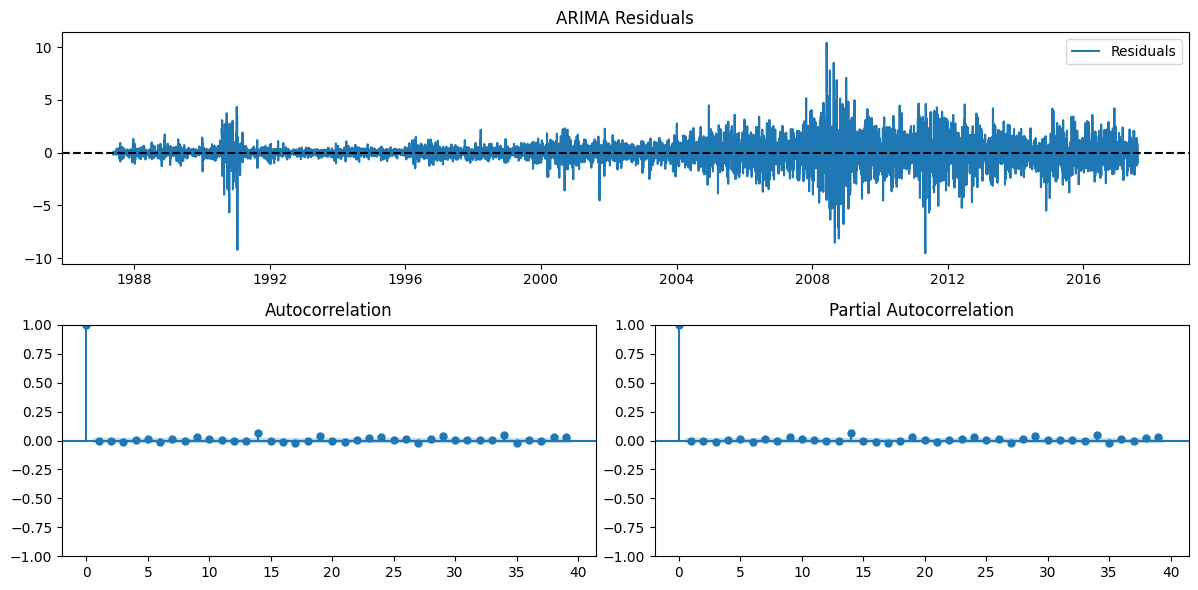

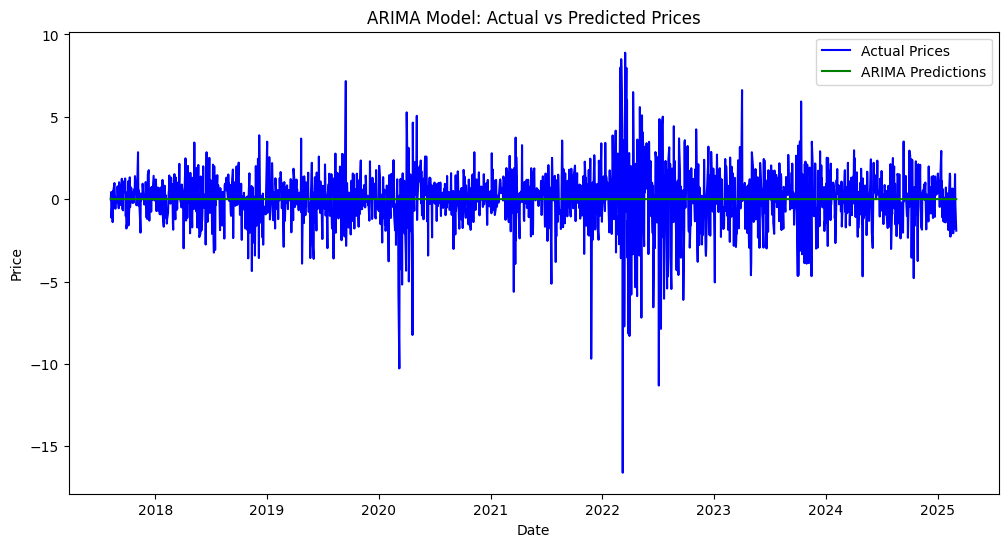

In [18]:
# Import Libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Load Dataset
prices = pd.read_csv('Cleaned_BrentOilPrices.csv', parse_dates=['Date'])
prices.set_index('Date', inplace=True)
prices_series = prices['Price']

# Step 2: Check Stationarity and Apply Differencing
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    return result[1] > 0.05  # True if the series is non-stationary

# Differencing if necessary
if check_stationarity(prices_series):
    prices_series = prices_series.diff().dropna()

# Step 3: Split Data into Training and Testing Sets
train_size = int(0.8 * len(prices_series))
train_prices = prices_series[:train_size]
test_prices = prices_series[train_size:]

# Step 4: Automatically Select ARIMA Order (Optional)
from pmdarima import auto_arima
auto_model = auto_arima(train_prices, seasonal=False, stepwise=True, suppress_warnings=True)
print("Optimal ARIMA Order:", auto_model.order)

# Step 5: Fit the ARIMA Model
arima_model = ARIMA(train_prices, order=auto_model.order)  # Use the selected order
arima_model_fit = arima_model.fit()

# Step 6: Forecast and Evaluate
arima_forecast = arima_model_fit.forecast(steps=len(test_prices))

# Calculate evaluation metrics
arima_mae = mean_absolute_error(test_prices, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test_prices, arima_forecast))
arima_mape = np.mean(np.abs((test_prices - arima_forecast) / (test_prices + 1e-10))) * 100  # Avoid division by zero

print(f"ARIMA MAE: {arima_mae}")
print(f"ARIMA RMSE: {arima_rmse}")
print(f"ARIMA MAPE: {arima_mape:.2f}%")

# Step 7: Residual Diagnostics
residuals = arima_model_fit.resid

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals, label='Residuals')
plt.axhline(0, linestyle='--', color='black')
plt.title('ARIMA Residuals')
plt.legend()

# Plot ACF and PACF of residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.subplot(223)
plot_acf(residuals, ax=plt.gca())
plt.subplot(224)
plot_pacf(residuals, ax=plt.gca())
plt.tight_layout()
plt.show()

# Step 8: Visual Comparison of Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(test_prices.index, test_prices, label='Actual Prices', color='blue')
plt.plot(test_prices.index, arima_forecast, label='ARIMA Predictions', color='green')
plt.title('ARIMA Model: Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [19]:
# Save the model
with open('arima_model.pkl', 'wb') as file:
    pickle.dump(arima_model_fit, file)
print("ARIMA model saved as 'arima_model.pkl'")

# Step 6: Load the Model (Optional, for Verification or Future Use)
with open('arima_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print("ARIMA model loaded successfully!")

ARIMA model saved as 'arima_model.pkl'
ARIMA model loaded successfully!


SARIMAX MAE: 52.09570932052271
SARIMAX RMSE: 56.99823032542301
SARIMAX MAPE: 75.83%


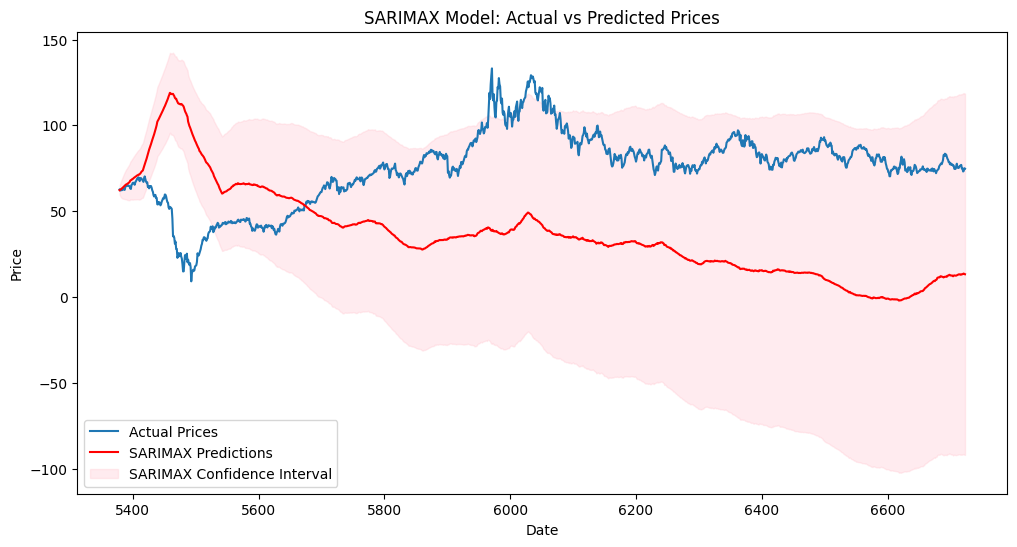

In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the datasets
prices = pd.read_csv('Cleaned_BrentOilPrices.csv', parse_dates=['Date'])
indicators = pd.read_csv('Cleaned_Economic_Indicators.csv', parse_dates=['Date'])

# Merge the datasets on the Date column
merged_data = pd.merge(prices, indicators, on='Date')

# Set the target variable and exogenous variables
prices_series = merged_data['Price']
exogenous_variables = merged_data[['GDP_Growth', 'Inflation_Rate', 'Unemployment_Rate', 'USD_EUR_Exchange_Rate']]

# Split data into training and testing sets
train_size = int(0.8 * len(prices_series))
train_prices = prices_series[:train_size]
test_prices = prices_series[train_size:]
train_exog = exogenous_variables[:train_size]
test_exog = exogenous_variables[train_size:]

# Fit the SARIMAX model
sarimax_model = SARIMAX(train_prices, exog=train_exog, 
                        order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
sarimax_model_fit = sarimax_model.fit(disp=False)

# Forecast using SARIMAX
sarimax_forecast = sarimax_model_fit.get_forecast(steps=len(test_prices), exog=test_exog)
sarimax_predicted = sarimax_forecast.predicted_mean
sarimax_conf_int = sarimax_forecast.conf_int()

# Calculate evaluation metrics
sarimax_mae = mean_absolute_error(test_prices, sarimax_predicted)
sarimax_rmse = np.sqrt(mean_squared_error(test_prices, sarimax_predicted))
sarimax_mape = np.mean(np.abs((test_prices - sarimax_predicted) / test_prices)) * 100

# Print evaluation metrics
print(f"SARIMAX MAE: {sarimax_mae}")
print(f"SARIMAX RMSE: {sarimax_rmse}")
print(f"SARIMAX MAPE: {sarimax_mape:.2f}%")

# Visual comparison
plt.figure(figsize=(12, 6))
plt.plot(test_prices.index, test_prices, label='Actual Prices')
plt.plot(test_prices.index, sarimax_predicted, label='SARIMAX Predictions', color='red')
plt.fill_between(test_prices.index, 
                 sarimax_conf_int.iloc[:, 0], 
                 sarimax_conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3, label='SARIMAX Confidence Interval')
plt.title('SARIMAX Model: Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Correlations with Price:
Price                    1.000000
GDP_Growth               0.469401
Inflation_Rate           0.541235
Unemployment_Rate        0.216165
USD_EUR_Exchange_Rate    0.604786
Name: Price, dtype: float64


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_ind

SARIMAX with Lagged Exogenous Variables MAE: 0.4167972390841355
SARIMAX with Lagged Exogenous Variables RMSE: 0.5327349367533342
SARIMAX with Lagged Exogenous Variables MAPE: nan%


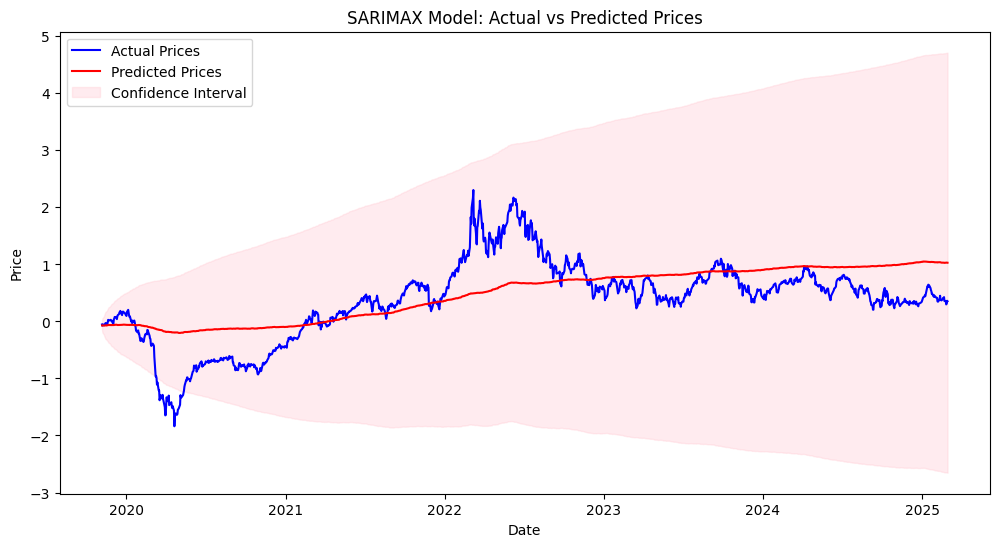

In [15]:
# Import Libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load and Merge Datasets
prices = pd.read_csv('Cleaned_BrentOilPrices.csv', parse_dates=['Date'])
indicators = pd.read_csv('Cleaned_Economic_Indicators.csv', parse_dates=['Date'])
data = pd.merge(prices, indicators, on='Date')
data.set_index('Date', inplace=True)

# Step 2: Filter for Highly Correlated Variables
correlation = data.corr()
print("Correlations with Price:")
print(correlation['Price'])

# Filter for variables with strong correlation (e.g., >0.5 or < -0.5)
high_corr_vars = correlation['Price'][(correlation['Price'] > 0.5) | (correlation['Price'] < -0.5)].index
filtered_data = data[high_corr_vars]

# Step 3: Lag the Exogenous Variables
lagged_data = filtered_data.shift(1)  # Lag by 1 time step
lagged_data['Price'] = data['Price']  # Keep target variable unlagged
lagged_data = lagged_data.dropna()  # Drop rows with NaN values due to lagging

# Step 4: Normalize the Data
scaler = StandardScaler()
lagged_data_scaled = lagged_data.copy()
lagged_data_scaled.iloc[:, :-1] = scaler.fit_transform(lagged_data.iloc[:, :-1])  # Normalize exogenous variables

# Step 5: Split the Data into Training and Testing Sets
train_size = int(0.8 * len(lagged_data_scaled))  # 80% train, 20% test
train = lagged_data_scaled.iloc[:train_size]
test = lagged_data_scaled.iloc[train_size:]

train_prices = train['Price']
test_prices = test['Price']
train_exog = train.drop(columns=['Price'])
test_exog = test.drop(columns=['Price'])

# Step 6: Fit the SARIMAX Model
sarimax_model = SARIMAX(train_prices, exog=train_exog, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
sarimax_model_fit = sarimax_model.fit(disp=False)

# Step 7: Forecast and Evaluate
forecast = sarimax_model_fit.get_forecast(steps=len(test_prices), exog=test_exog)
predicted = forecast.predicted_mean
conf_int = forecast.conf_int()

# Calculate evaluation metrics
mae = mean_absolute_error(test_prices, predicted)
rmse = np.sqrt(mean_squared_error(test_prices, predicted))
mape = np.mean(np.abs((test_prices - predicted) / (test_prices + 1e-10))) * 100

print(f"SARIMAX with Lagged Exogenous Variables MAE: {mae}")
print(f"SARIMAX with Lagged Exogenous Variables RMSE: {rmse}")
print(f"SARIMAX with Lagged Exogenous Variables MAPE: {mape:.2f}%")

# Step 8: Visualize the Results
plt.figure(figsize=(12, 6))
plt.plot(test_prices.index, test_prices, label='Actual Prices', color='blue')
plt.plot(test_prices.index, predicted, label='Predicted Prices', color='red')
plt.fill_between(test_prices.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.title('SARIMAX Model: Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [17]:
# Save the model
with open('sarimax_model.pkl', 'wb') as file:
    pickle.dump(sarimax_model_fit, file)
print("SARIMAX model saved as 'sarimax_model.pkl'")

# Step 7: Load the model (for verification or future use)
with open('sarimax_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
print("SARIMAX model loaded successfully!")

SARIMAX model saved as 'sarimax_model.pkl'
SARIMAX model loaded successfully!


Price is not stationary, differencing...
GDP_Growth is not stationary, differencing...
Inflation_Rate is not stationary, differencing...
USD_EUR_Exchange_Rate is not stationary, differencing...


c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Optimal Lag Order Selection:
 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0     -0.7311     -0.7260      0.4814     -0.7293
1      -10.31      -10.28   3.320e-05      -10.30
2      -11.43      -11.37   1.089e-05      -11.41
3      -11.72      -11.64   8.148e-06      -11.69
4      -11.96      -11.85   6.396e-06      -11.92
5     -12.13*     -12.00*  5.394e-06*     -12.08*
-------------------------------------------------
VAR MAE: 0.22912847211063223
VAR RMSE: 0.4353117051214899


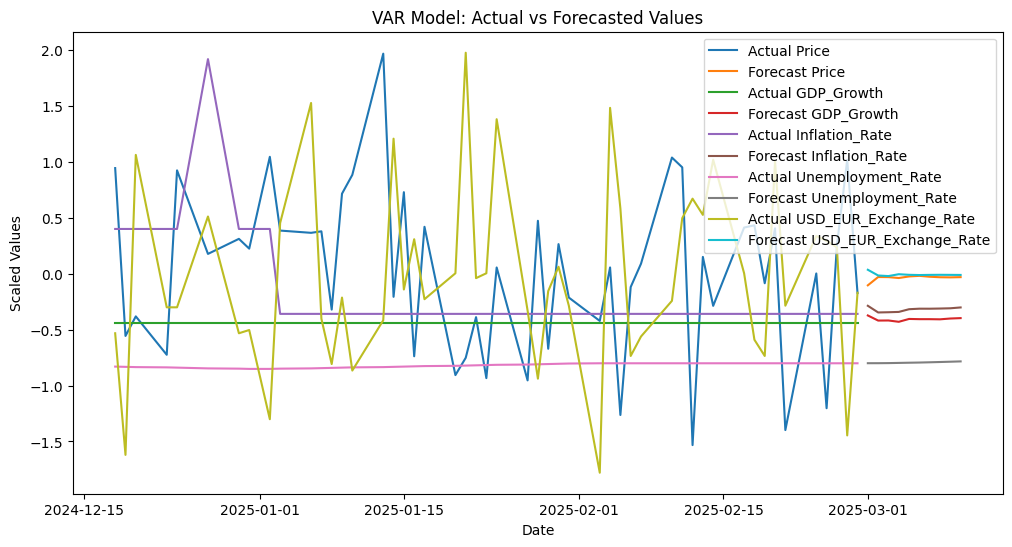

In [10]:
# Import Libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Load and Merge Datasets
prices = pd.read_csv('Cleaned_BrentOilPrices.csv', parse_dates=['Date'])
indicators = pd.read_csv('Cleaned_Economic_Indicators.csv', parse_dates=['Date'])
data = pd.merge(prices, indicators, on='Date')
data.set_index('Date', inplace=True)

# Step 2: Handle Missing Values
if data.isnull().values.any():
    print("Handling missing values...")
    data = data.fillna(method='ffill').fillna(method='bfill')

# Step 3: Ensure All Variables are Stationary
def make_stationary(data):
    stationary_data = pd.DataFrame()
    for column in data.columns:
        adf_test = adfuller(data[column])
        if adf_test[1] > 0.05:  # If not stationary, difference the series
            print(f"{column} is not stationary, differencing...")
            stationary_data[column] = data[column].diff().dropna()
        else:
            stationary_data[column] = data[column]
    return stationary_data

data = make_stationary(data)

# Step 4: Normalize Data (Optional)
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

# Step 5: Fit the VAR Model
model = VAR(data_scaled)

# Select the optimal lag order
lag_order = model.select_order(maxlags=5)  # Reduced maxlags to avoid instability
print("Optimal Lag Order Selection:")
print(lag_order.summary())

# Fit the VAR model with the optimal lag order
fitted_model = model.fit(lag_order.aic)

# Step 6: Forecast Future Values
forecast_steps = 10  # Forecast the next 10 steps
forecast = fitted_model.forecast(data_scaled.values[-fitted_model.k_ar:], steps=forecast_steps)

# Prepare the forecast DataFrame
forecast_index = pd.date_range(start=data_scaled.index[-1], periods=forecast_steps + 1, freq='D')[1:]
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=data_scaled.columns)

# Step 7: Evaluate the Model
# Prepare actual values for evaluation (if available)
actual_values = data_scaled.iloc[-forecast_steps:]

# Calculate metrics
mae = mean_absolute_error(actual_values, forecast)
rmse = np.sqrt(mean_squared_error(actual_values, forecast))

print(f"VAR MAE: {mae}")
print(f"VAR RMSE: {rmse}")

# Step 8: Visualize Results
plt.figure(figsize=(12, 6))
for column in forecast_df.columns:
    plt.plot(data_scaled.index[-50:], data_scaled[column].iloc[-50:], label=f'Actual {column}')
    plt.plot(forecast_index, forecast_df[column], label=f'Forecast {column}')
plt.legend()
plt.title('VAR Model: Actual vs Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Scaled Values')
plt.show()
